# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [51]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

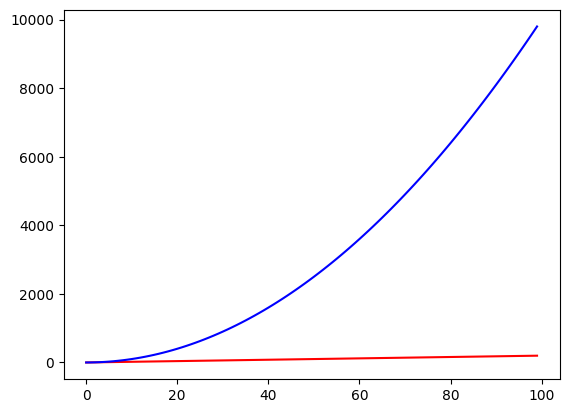

In [52]:
# Method 1

plt.plot(x,y,"r-")
plt.plot(x,z,"b-")

plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

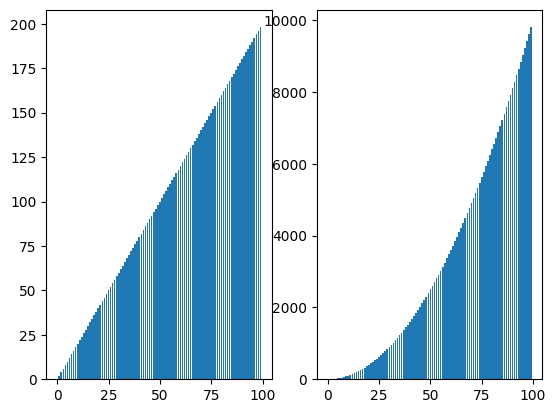

In [41]:
# Method 2

plot_options , (chart_1,chart_2) = plt.subplots(nrows = 1, ncols = 2)
chart_1.bar(x,y)
chart_2.bar(x,z)

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels.

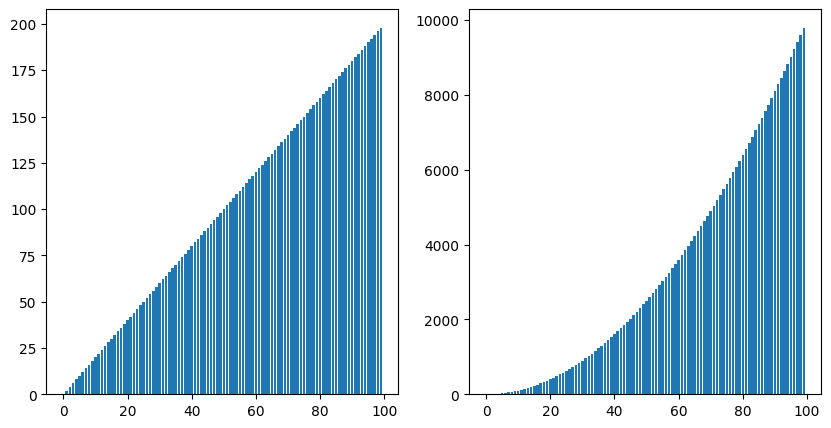

In [42]:
# your code here

plot_options , (chart_1,chart_2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

chart_1.bar(x,y)
chart_2.bar(x,z)

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

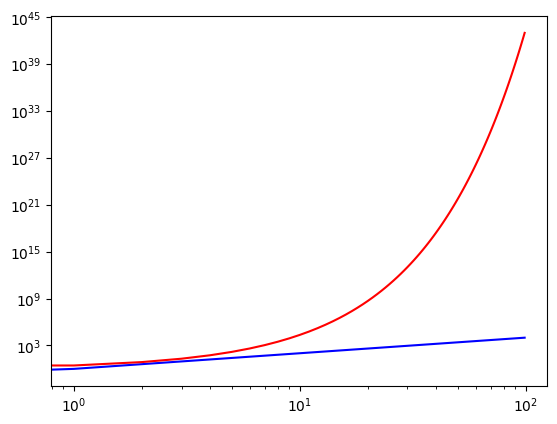

In [71]:
fig, chart_1 = plt.subplots()

chart_1.plot(x,x**2,"b-")
chart_1.set_xscale("log")
chart_1.plot(x,np.exp(x),"r-")
chart_1.set_yscale('log')

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

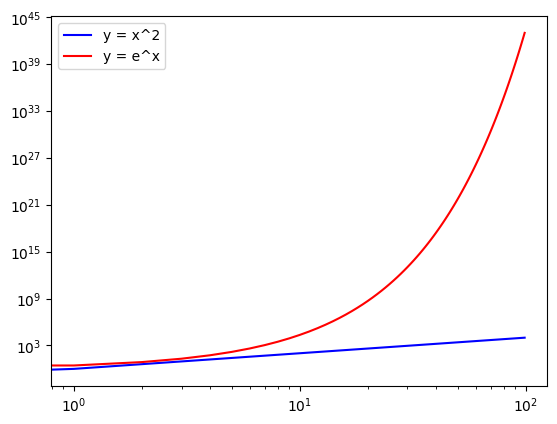

In [67]:
# your code here

fig, chart_1 = plt.subplots()

chart_1.plot(x,x**2,"b-",label='y = x^2')
chart_1.set_xscale("log")

chart_1.plot(x,np.exp(x),"r-",label='y = e^x')
chart_1.set_yscale('log')

chart_1.legend()

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [75]:
# your code here

fitbit = pd.read_csv("Fitbit2.csv")
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo.

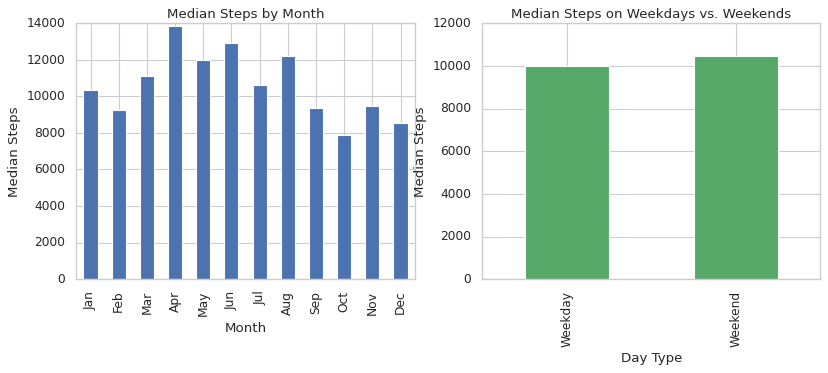

In [177]:
plt.figure(figsize=(12, 4))

# MEDIAN STEPS BY MONTH_ENCODED
# your code here

plt.subplot(1, 2, 1)
median_steps_by_month = fitbit.groupby('Months_encoded')['Steps'].median()
median_steps_by_month.plot(kind='bar', color='b')
plt.title("Median Steps by Month")
plt.xlabel("Month")
plt.ylabel("Median Steps")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

plt.subplot(1, 2, 2)
activity_by_weekday = fitbit.groupby('Work_or_Weekend')['Steps'].median()
activity_by_weekday.plot(kind='bar', color='g')
plt.title("Median Steps on Weekdays vs. Weekends")
plt.xlabel("Day Type")
plt.ylabel("Median Steps")
plt.xticks([0, 1], ["Weekday", "Weekend"])

plt.savefig('desktop\fitbit_analysis.png')

plt.show()


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

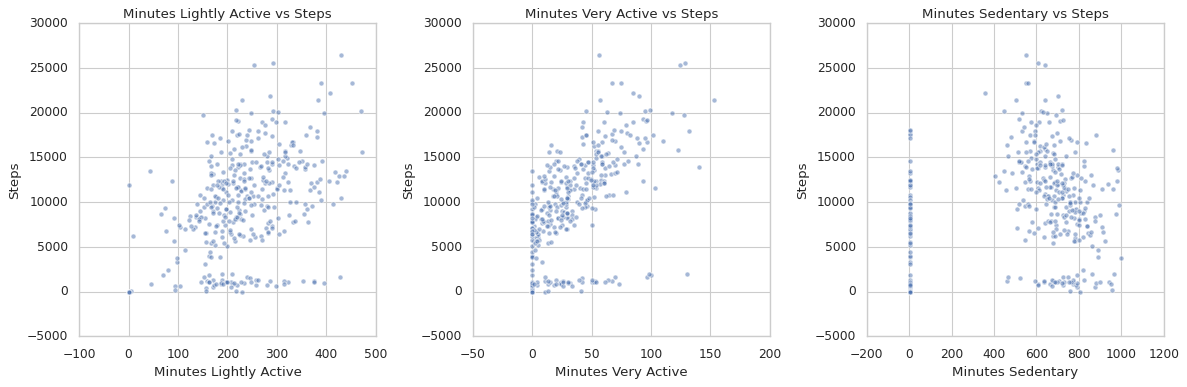

In [178]:
# your code here

feature_pairs = [("Minutes Lightly Active", "Steps"),
                 ("Minutes Very Active", "Steps"),
                 ("Minutes Sedentary", "Steps")]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes[i]
    ax.scatter(fitbit[x_feature], fitbit[y_feature], alpha=0.5)
    ax.set_title(f"{x_feature} vs {y_feature}")
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)

plt.tight_layout()
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [77]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [78]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [79]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(exclude="object")


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [80]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include="object")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

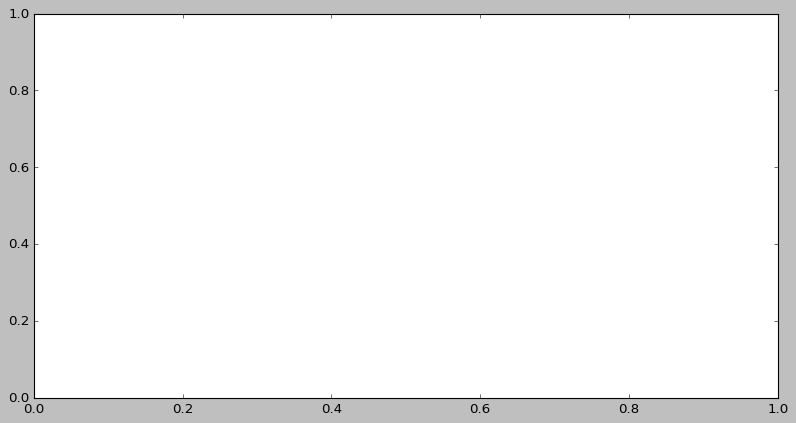

In [97]:
# your code here

import matplotlib.style
import matplotlib.pyplot as plt

matplotlib.style.use('classic')

fig, chart_2 = plt.subplots(figsize=(12, 6))



#### Use the right visulalization to show the distribution of column `Age`.

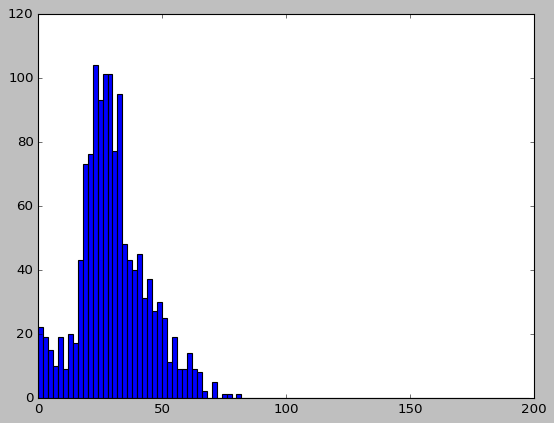

In [103]:
plt.hist(titanic["Age"],y)

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([162., 963.]),
 array([10., 20., 50.]),
 <BarContainer object of 2 artists>)

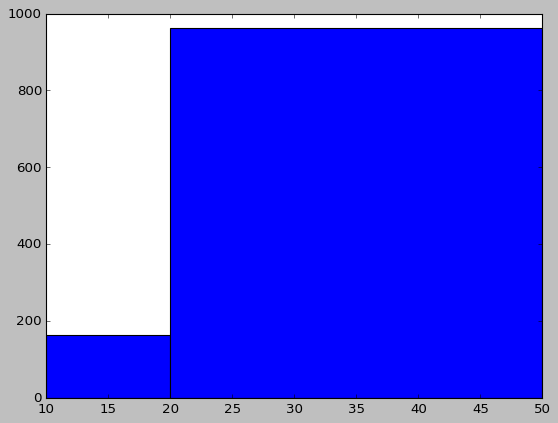

In [106]:
# your code here

plt.hist(titanic["Age"], [10,20,50])

#### How does the bin size affect your plot?

In [107]:
"""
This bin size negatively impact the plot. Too much data is mixed together which doesn't allow an analysis.
Visualy, it also doesn't give us an idea of how the data is spread out.

With more bins, we would have a better understandiing of our data.
"""

"\nThe bin size negatively impact the plot. Too much data is mixed together which doesn't allow an analysis. \nVisualy, it also doesn't give us an idea of how the data is spread out. \n"

#### Use seaborn to show the distribution of column `Age`.

<Axes: >

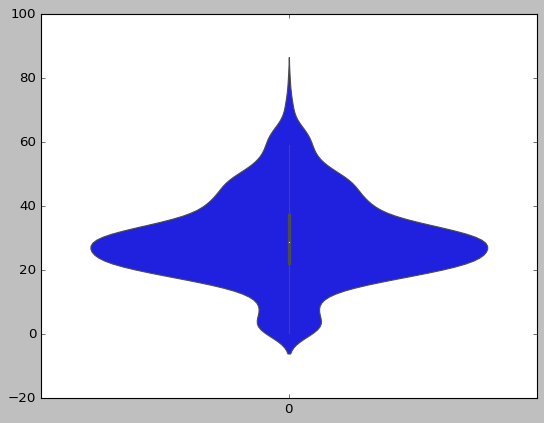

In [117]:
# your code here

import seaborn as sns

sns.violinplot(titanic["Age"])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

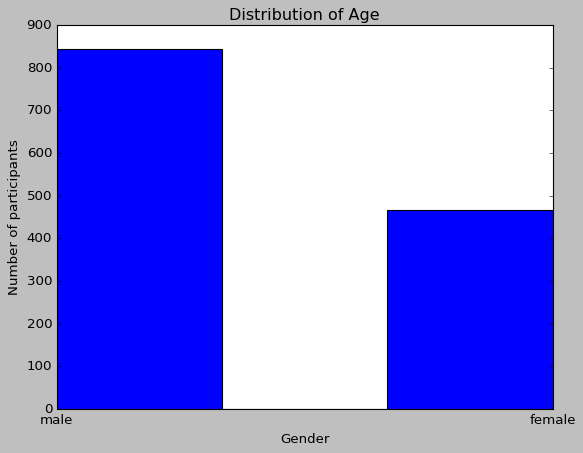

In [131]:
# Method 1 - matplotlib
# your code here

plt.hist(titanic["Gender"],3)

plt.ylabel("Number of participants")
plt.xlabel("Gender")
plt.title('Distribution of Age')

plt.show()

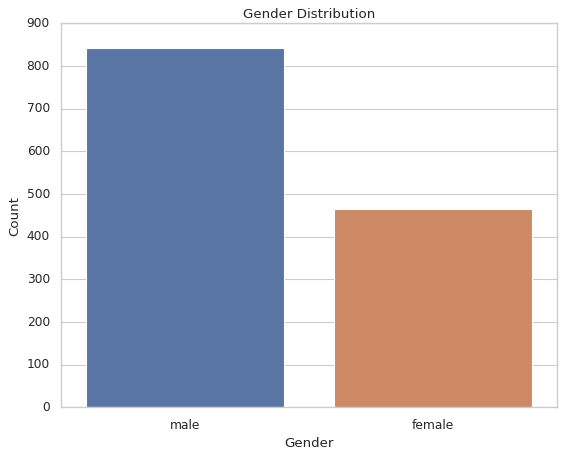

In [143]:
# Method 2 - seaborn
# your code here

sns.set(style="whitegrid")

sns.countplot(data=titanic, x="Gender")

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")

plt.show()

#### Use the right plot to visualize the column `Pclass`.

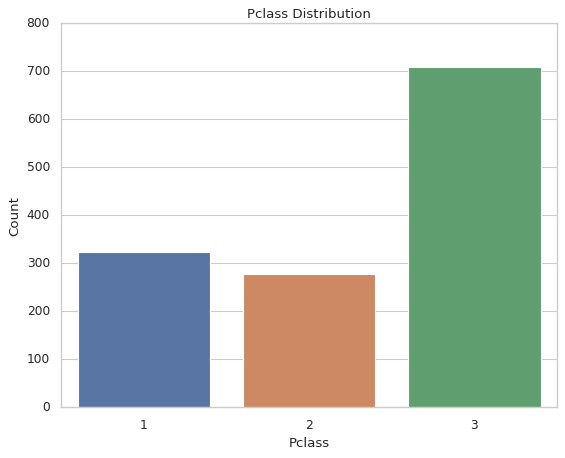

In [147]:
sns.set(style="whitegrid")

sns.countplot(data=titanic, x="Pclass")

plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass Distribution")

plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it.

In [148]:
titanic["Age"].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ea7bf80e260>,
 'caps': [<matplotlib.lines.Line2D at 0x7ea7bf80e7a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ea7bf80dfc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ea7bf80ece0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ea7bf80ef80>],
 'means': []}

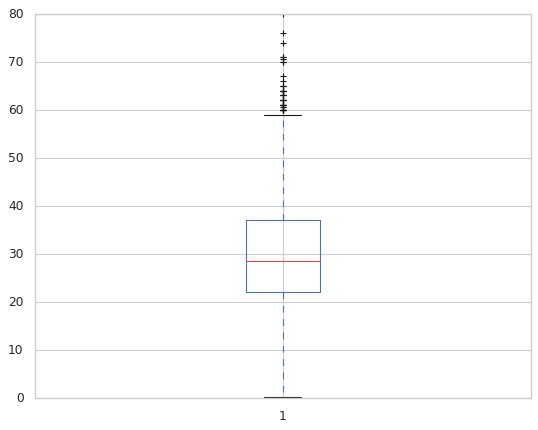

In [151]:
plt.boxplot(titanic["Age"])

In [ ]:
"""
I would use a boxplot as this is the information that it provides.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
We can see that the mean age is slightly below 30 years old.
50% of our participant have between 22 and 37 years old.

We also have a few participants between 60 and 80 years old.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it.

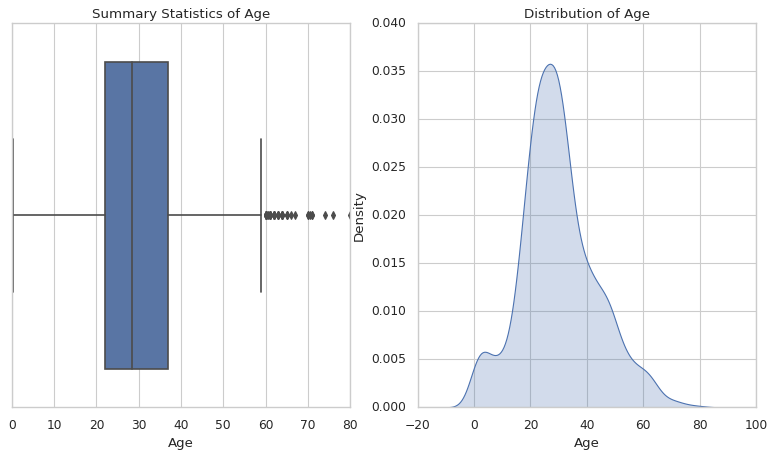

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(ax=axes[0], x=titanic["Age"], orient="h")
axes[0].set_title("Summary Statistics of Age")
axes[0].set_xlabel("Age")

sns.kdeplot(data=titanic["Age"], ax=axes[1], fill=True)
axes[1].set_title("Distribution of Age")
axes[1].set_xlabel("Age")

plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [161]:
"""
It provides us more info on the shape of the graph.
"""

'\nIt provides us more info on the shape of the graph. \n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

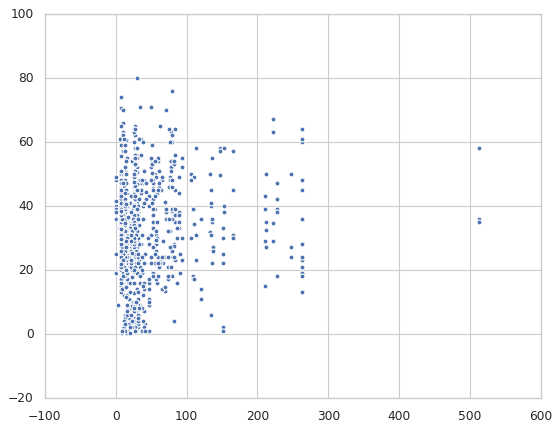

In [168]:
# Method 1 - matplotlib
# your code here

x = titanic[['Fare']]
y = titanic['Age']

plt.scatter(x,y)
plt.show()

In [170]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

28.396927011070392

array([0.04453757])

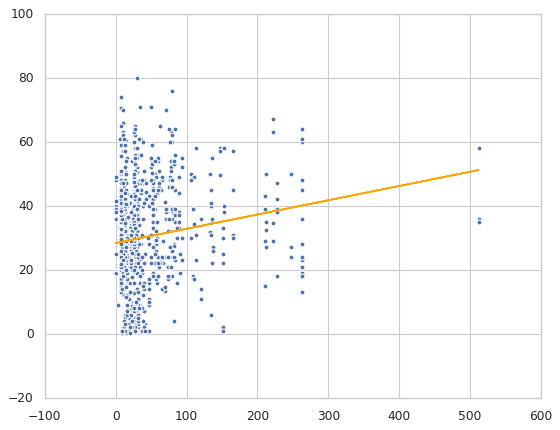

In [171]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

In [ ]:
# Method 2 - seaborn
# your code here

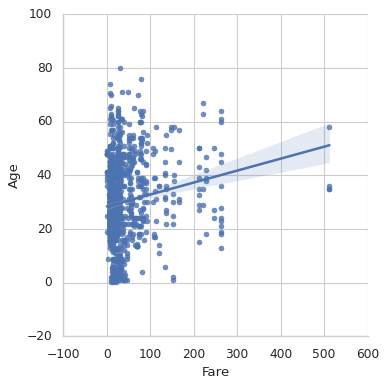

In [165]:
from sklearn.linear_model import LinearRegression

sns.lmplot(x="Fare", y="Age", data=titanic, order=1)
plt.show()

#### Plot the correlation matrix using seaborn.

<ipython-input-172-4cf4725c7f10>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()


<Axes: >

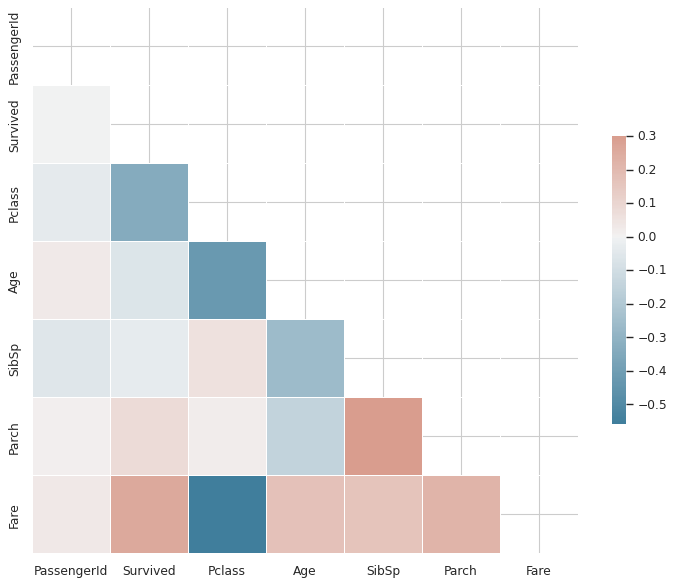

In [172]:
# your code here

corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### What are the most correlated features?

In [ ]:
"""
The most correlated features seem to be :
 - the Fare and the Pclass
 - the Age and the Pclass
 - the Parch and the SibSp
 - the Fare and the Survived column.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

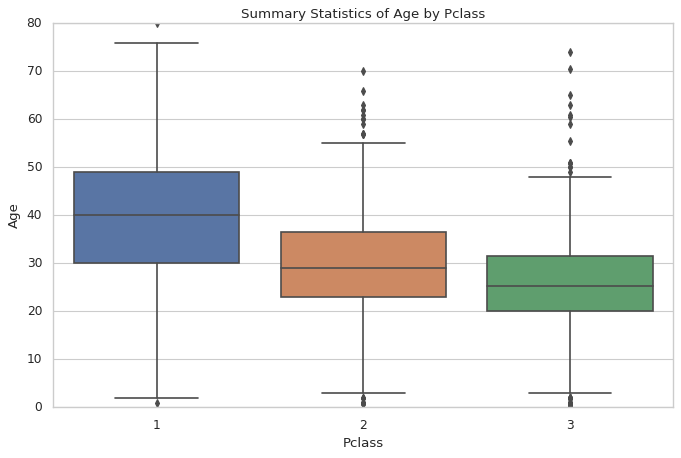

In [173]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=titanic, x='Pclass', y='Age')
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.title("Summary Statistics of Age by Pclass")

plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

<Figure size 800x480 with 0 Axes>

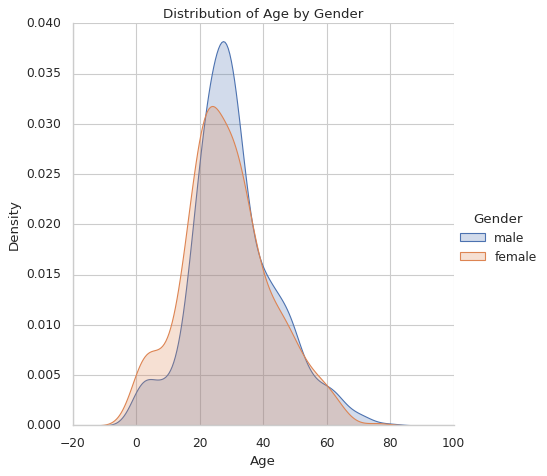

In [174]:
plt.figure(figsize=(10, 6))

g = sns.FacetGrid(titanic, hue='Gender', height=6)

g.map(sns.kdeplot, 'Age', fill=True)

g.set_axis_labels("Age", "Density")
plt.title("Distribution of Age by Gender")

g.add_legend()

plt.show()
